# Multivariate Distribution

> In this post, we will build multivariate distribution. This is the summary of lecture "Probabilistic Deep Learning with Tensorflow 2" from Imperial College London.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Coursera, Tensorflow_probability, ICL]
- image: images/2d_gaussian.png

## Packages

In [17]:
import tensorflow as tf
import tensorflow_probability as tfp

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tfd = tfp.distributions
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
print("Tensorflow Version: ", tf.__version__)
print("Tensorflow Probability Version: ", tfp.__version__)

Tensorflow Version:  2.5.0
Tensorflow Probability Version:  0.13.0


## Multivariate Distribution

Mutlivariate distribution is the joint distribution that consists of multiple univariate random variable. Usually, one widely-used multivariate distribution is Multivariate Normal Distribution (or MVN for short). From [wikipedia](https://en.wikipedia.org/wiki/Multivariate_normal_distribution),

> he multivariate normal distribution, multivariate Gaussian distribution, or joint normal distribution is a generalization of the one-dimensional (univariate) normal distribution to higher dimensions. One definition is that a random vector is said to be k-variate normally distributed if every linear combination of its k components has a univariate normal distribution. Its importance derives mainly from the multivariate central limit theorem. The multivariate normal distribution is often used to describe, at least approximately, any set of (possibly) correlated real-valued random variables each of which clusters around a mean value.

This distribution is the element for constructing neural network architecture, such as Variational AutoEncoder (VAE).

### Basic multivariate distributions

We can make 2D multivariate Normal Distribution with diagonal covariance matrix. The formal form is like this,

$$ X \sim \mathcal{N}(\mu, \Sigma) $$

This distribution contains mean vector $\mu$,

$\mu = E[X] = (E[X_1], E[X_2], \dots, E[X_k])^T$

and $k \times k$ covariance Matrix.

$\Sigma_{i,j} = E[(X_i-\mu_i)(X_j - \mu_j)] = Cov[X_i, X_j] $

In [4]:
# Define 2D multivariate Normal distribution with diagonal covariance matrix
normal_diag = tfd.MultivariateNormalDiag(loc=[0, 1], scale_diag=[1, 2])
normal_diag

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

The usage is the same as univariate distribution. You need to define loc (mean) and scale (standard deviation) of each random variables. Above case, we used 2 random variables that one has 0 mean and 1 standard deviation, and the other is 1 mean and 2 standard deviation. Note that, this distribution has event_shape of 2.

In [5]:
normal_diag.sample(5)

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[ 2.8616788 , -0.38970935],
       [-0.23513892, -1.5368791 ],
       [-0.42713124, -0.48392642],
       [ 0.9403765 ,  2.914402  ],
       [-0.45310387, -0.61969984]], dtype=float32)>

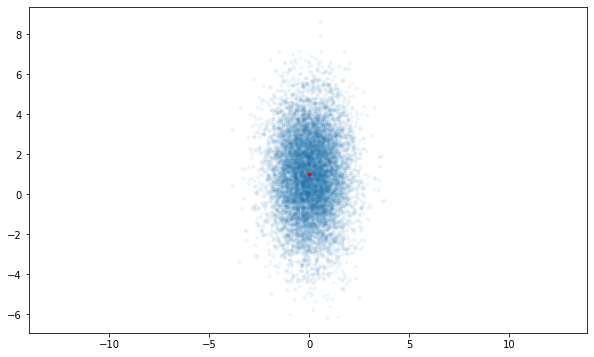

In [9]:
samples = normal_diag.sample(10000)
plt.plot(0, 1, c='r', marker='.') # Center point (0, 1)
plt.scatter(samples[:, 0], samples[:, 1], marker='.', alpha=0.05)
plt.axis('equal')
plt.show()

### Batches of multivariate distributions

In [10]:
# Create three "batches" of multivariate normals
normal_diag_batch = tfd.MultivariateNormalDiag(loc=[[0, 0], [0, 0], [0, 0]],
                                               scale_diag=[[1, 2], [2, 1], [2, 2]])
normal_diag_batch

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[3] event_shape=[2] dtype=float32>

In this case, we built 3 batches of multivariate normal distribution. You can see the batch_shape of 3.

In [12]:
samples = normal_diag_batch.sample(5)
samples

<tf.Tensor: shape=(5, 3, 2), dtype=float32, numpy=
array([[[ 0.54938745,  3.2343671 ],
        [ 2.0630057 , -0.22117338],
        [ 1.4602997 ,  0.6154384 ]],

       [[-0.48758066, -3.6894617 ],
        [-0.68254   , -1.9999902 ],
        [ 0.09972456, -0.68538326]],

       [[ 1.8619668 ,  1.7146002 ],
        [ 2.2729723 ,  1.2265631 ],
        [-0.7838083 , -2.096915  ]],

       [[ 0.31185022, -1.4191006 ],
        [-1.9356333 ,  1.8224419 ],
        [ 0.7653813 ,  1.0019186 ]],

       [[-1.159586  , -3.834509  ],
        [ 3.2854838 , -0.89201176],
        [ 0.26501343,  0.49291056]]], dtype=float32)>

In above code, the tensor shape has `(5, 3, 2)`. First element shows the number of sample, and second element is batch_size. And last one is the number of random variable.

In [13]:
# Compute log probs
normal_diag_batch.log_prob(samples)

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-3.9895787, -3.087482 , -3.5380764],
       [-4.3514075, -4.589237 , -3.2841334],
       [-4.631966 , -3.9290533, -3.8505974],
       [-2.8313804, -4.660006 , -3.4228776],
       [-5.0412765, -4.2781672, -3.2633204]], dtype=float32)>

In [15]:
samples_batch = normal_diag_batch.sample(10000)
samples_batch.shape

TensorShape([10000, 3, 2])

If you are not sure about this distribution, you can plot it with each random variable.

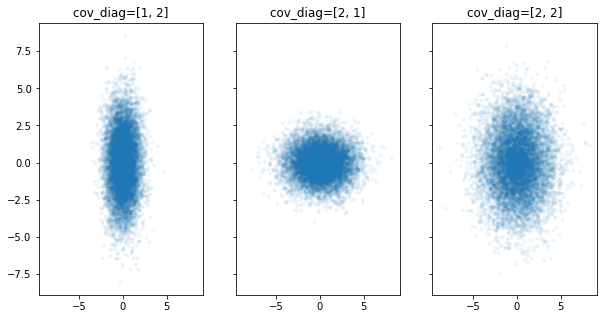

In [16]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10, 5))
titles = ['cov_diag=[1, 2]', 'cov_diag=[2, 1]', 'cov_diag=[2, 2]']

for i, (ax, title) in enumerate(zip(ax, titles)):
    samples = samples_batch[:, i, :]
    ax.scatter(samples[:, 0], samples[:, 1], marker='.', alpha=0.05)
    ax.set_title(title)
plt.show()

## Multivariate Normal Distribution with full covariance.
In the previous section, we covered multivariate distribution with diagonal covariance matrix, i.e. $\Sigma = \sigma^2 I$. This is known as a **spherical** or **isotropic** Gaussian. This name comes from the spherical (or circular) contours of its probability density function, as you can see from the plot below for the two-dimensional case.

In [18]:
spherical_2d_gaussian = tfd.MultivariateNormalDiag(loc=[0, 0])
samples = spherical_2d_gaussian.sample(10000)

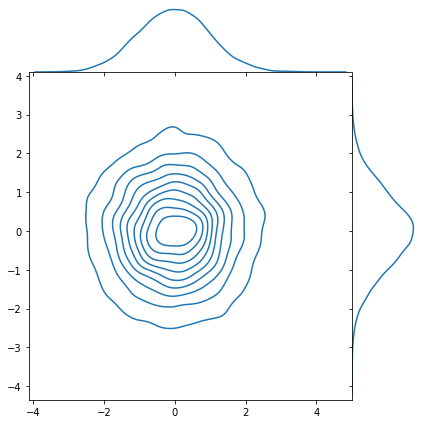

In [20]:
sns.jointplot(x=samples[:, 0], y=samples[:, 1], kind='kde', space=0)
plt.show()

Note that, diagonal covariance matrix results in the components of the random vector being independent.

### Full covariance with `MultivariateNormalFullTriL`

You can define a full covariance Gaussian distribution in TensorFlow using the Distribution `tfd.MultivariateNormalTriL`.

For the reference, `FullTriL` stands for Full covariance with Lower Triangular matrix.

Mathematically, the parameters of a multivariate Gaussian are a mean $\mu$ and a covariance matrix $\Sigma$, and so the `tfd.MultivariateNormalTriL` constructor requires two arguments:

- `loc`, a Tensor of floats corresponding to $\mu$,
- `scale_tril`, a a lower-triangular matrix $L$ such that $LL^T = \Sigma$.

For a $d$-dimensional random variable, the lower-triangular matrix $L$ looks like this:

\begin{equation}
    L = \begin{bmatrix}
            l_{1, 1} & 0 & 0 & \cdots & 0 \\
            l_{2, 1} & l_{2, 2} & 0 & \cdots & 0  \\
            l_{3, 1} & l_{3, 2} & l_{3, 3} & \cdots & 0  \\
            \vdots  & \vdots & \vdots & \ddots & \vdots \\
            l_{d, 1} & l_{d, 2} & l_{d, 3} & \cdots & l_{d, d}
        \end{bmatrix},
\end{equation}

where the diagonal entries are positive: $l_{i, i} > 0$ for $i=1,\ldots,d$.

Here is an example of creating a two-dimensional Gaussian with non-diagonal covariance:

In [21]:
mu = [0., 0.]
scale_tril = [[1., 0.],
              [0.6, 0.8]]

sigma = tf.matmul(tf.constant(scale_tril), tf.transpose(tf.constant(scale_tril)))
sigma

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1. , 0.6],
       [0.6, 1. ]], dtype=float32)>

In [22]:
# Create the 2D Gaussian with full covariance
nonspherical_2d_gaussian = tfd.MultivariateNormalTriL(loc=mu, scale_tril=scale_tril)
nonspherical_2d_gaussian

<tfp.distributions.MultivariateNormalTriL 'MultivariateNormalTriL' batch_shape=[] event_shape=[2] dtype=float32>

In [23]:
nonspherical_2d_gaussian.mean()

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0., 0.], dtype=float32)>

In [24]:
nonspherical_2d_gaussian.covariance()

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1. , 0.6],
       [0.6, 1. ]], dtype=float32)>

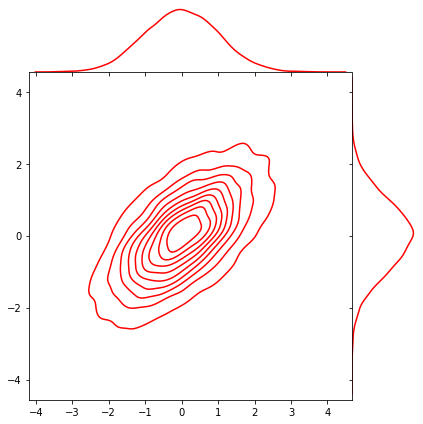

In [26]:
samples = nonspherical_2d_gaussian.sample(10000)
sns.jointplot(x=samples[:, 0], y=samples[:, 1], kind='kde', space=0, color='r')
plt.show()

As you can see, the approximate density contours are now elliptical rather than circular. This is because the components of the Gaussian are correlated.

Also note that the marginal distributions (shown on the sides of the plot) are both univariate Gaussian distributions.

### The Cholesky decomposition

In the above example, we defined the lower triangular matrix $L$ and used that to build the multivariate Gaussian distribution. The covariance matrix is easily computed from $L$ as $\Sigma = LL^T$.

The reason that we define the multivariate Gaussian distribution in this way - as opposed to directly passing in the covariance matrix - is that not every matrix is a valid covariance matrix. The covariance matrix must have the following properties:

1. It is symmetric
2. It is positive (semi-)definite

> A symmetric matrix $M \in \mathbb{R}^{d\times d}$ is positive semi-definite if it satisfies $b^TMb \ge 0$ for all nonzero $b\in\mathbb{R}^d$. If, in addition, we have $b^TMb = 0 \Rightarrow b=0$ then $M$ is positive definite. 

The [**Cholesky decomposition**](https://en.wikipedia.org/wiki/Cholesky_decomposition) is a useful way of writing a covariance matrix. The decomposition is described by this result:

> For every real-valued symmetric positive-definite matrix $M$, there is a unique lower-diagonal matrix $L$ that has  positive diagonal entries for which  
>
> \begin{equation}
     LL^T = M
 \end{equation}
> This is called the _Cholesky decomposition_ of $M$.

This result shows us why Gaussian distributions with full covariance are completely represented by the `MultivariateNormalTriL` Distribution.

#### `tf.linalg.cholesky`

In case you have a valid covariance matrix $\Sigma$ and would like to compute the lower triangular matrix $L$ above to instantiate a `MultivariateNormalTriL` object, this can be done with the `tf.linalg.cholesky` function. 

In [27]:
# define a symmetric positive-definite matrix

sigma = [[10., 5.], [5., 10.]]

In [28]:
# Compute the lower triangular matrix L from the Cholesky decomposition

scale_tril = tf.linalg.cholesky(sigma)
scale_tril

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[3.1622777, 0.       ],
       [1.5811388, 2.7386127]], dtype=float32)>

You can check the result with formal definition.

In [29]:
tf.linalg.matmul(scale_tril, tf.transpose(scale_tril))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[10.      ,  5.      ],
       [ 5.      ,  9.999999]], dtype=float32)>

If the argument to the `tf.linalg.cholesky` is not positive definite, then it will fail:

In [30]:
# Try to compute the Cholesky decomposition for a matrix with negative eigenvalues

bad_sigma = [[10., 11.], [11., 10.]]

try:
    scale_tril = tf.linalg.cholesky(bad_sigma)
except Exception as e:
    print(e)

Cholesky decomposition was not successful. The input might not be valid. [Op:Cholesky]


### What about positive semi-definite matrices?

In cases where the matrix is only positive semi-definite, the Cholesky decomposition exists (if the diagonal entries of $L$ can be zero) but it is not unique.

For covariance matrices, this corresponds to the degenerate case where the probability density function collapses to a subspace of the event space. This is demonstrated in the following example:

In [31]:
# Create a multivariate Gaussian with a positive semi-definite covariance matrix
psd_mvn = tfd.MultivariateNormalTriL(loc=[0., 0.], scale_tril=[[1., 0.], [0.4, 0.]])
psd_mvn

<tfp.distributions.MultivariateNormalTriL 'MultivariateNormalTriL' batch_shape=[] event_shape=[2] dtype=float32>

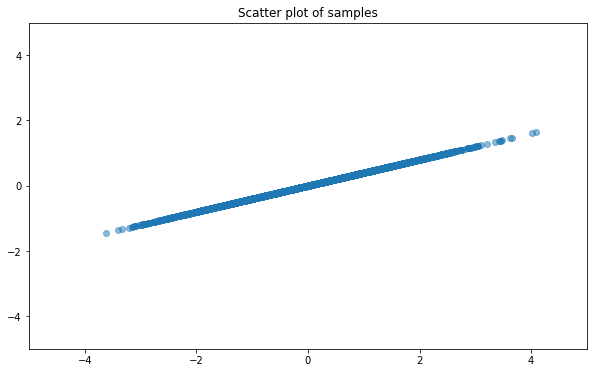

In [32]:
samples = psd_mvn.sample(10000)

plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.title('Scatter plot of samples')
plt.show()

If the input to the function `tf.linalg.cholesky` is positive semi-definite but not positive definite, it will also fail:

In [33]:
# Try to compute the Cholesky decomposition for a positive semi-definite matrix

another_bad_sigma = [[10., 0.], [0., 0.]]

try:
    scale_tril = tf.linalg.cholesky(another_bad_sigma)
except Exception as e:
    print(e)

Cholesky decomposition was not successful. The input might not be valid. [Op:Cholesky]


In summary: if the covariance matrix $\Sigma$ for your multivariate Gaussian distribution is positive-definite, then an algorithm that computes the Cholesky decomposition of $\Sigma$ returns a lower-triangular matrix $L$ such that $LL^T = \Sigma$. This $L$ can then be passed as the `scale_tril` of `MultivariateNormalTriL`.

### Putting it all together

You are now ready to put everything that you have learned in this reading together.

To create a multivariate Gaussian distribution with full covariance you need to:

1. Specify parameters $\mu$ and either $\Sigma$ (a symmetric positive definite matrix) or $L$ (a lower triangular matrix with positive diagonal elements), such that $\Sigma = LL^T$.

2. If only $\Sigma$ is specified, compute `scale_tril = tf.linalg.cholesky(sigma)`.

3. Create the distribution: `multivariate_normal = tfd.MultivariateNormalTriL(loc=mu, scale_tril=scale_tril)`.

In [34]:
# Create a multivariate Gaussian distribution

mu = [1., 2., 3.]
sigma = [[0.5, 0.1, 0.1],
         [0.1, 1., 0.6],
          [0.1, 0.6, 2.]]

scale_tril = tf.linalg.cholesky(sigma)
multivariate_normal = tfd.MultivariateNormalTriL(loc=mu, scale_tril=scale_tril)

In [35]:
multivariate_normal.covariance()

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0.4999999 , 0.09999999, 0.09999999],
       [0.09999999, 1.0000001 , 0.6000001 ],
       [0.09999999, 0.6000001 , 2.0000002 ]], dtype=float32)>

In [36]:
multivariate_normal.mean()

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

### Deprecated: `MultivariateNormalFullCovariance`

There was previously a class called `tfd.MultivariateNormalFullCovariance` which takes the full covariance matrix in its constructor, but this is being deprecated. Two reasons for this are:

* covariance matrices are symmetric, so specifying one directly involves passing redundant information, which involves writing unnecessary code.  
* it is easier to enforce positive-definiteness through constraints on the elements of a decomposition than through a covariance matrix itself. The decomposition's only constraint is that its diagonal elements are positive, a condition that is easy to parameterize for.

## Further reading and resources
* https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/MultivariateNormalTriL
* https://www.tensorflow.org/api_docs/python/tf/linalg/cholesky